# Imports

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, precision_recall_curve

ModuleNotFoundError: No module named 'kagglehub'

# Datset

In [ ]:
file_path = "transaction_dataset.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "vagifa/ethereum-frauddetection-dataset",
  file_path,
)

df.head()

100%|██████████| 923k/923k [00:00<00:00, 1.81MB/s]

Extracting zip of transaction_dataset.csv...


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
df.drop(columns=['Unnamed: 0','Index','Address'],inplace=True)
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [ ]:
df.isna().sum()

,0
FLAG,0
Avg min between sent tnx,0
Avg min between received tnx,0
Time Diff between first and last (Mins),0
Sent tnx,0
Received Tnx,0
Number of Created Contracts,0
Unique Received From Addresses,0
Unique Sent To Addresses,0
min value received,0


In [ ]:
for i in df.columns:
  if i.startswith(' '):
    df[i.strip()]=df[i]
    df.drop(i,axis=1,inplace=True)
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx',
       'ERC20 avg time between rec tnx', 'ERC20 avg time between 

In [ ]:
drop_cols=[]
for i in df.select_dtypes(exclude='object').columns:
  #print(i+':',df[i].skew(),df[i].nunique())
  if df[i].skew()==0 and df[i].nunique()==1:
    drop_cols.append(i)
drop_cols

['ERC20 avg time between sent tnx',
 'ERC20 avg time between rec tnx',
 'ERC20 avg time between rec 2 tnx',
 'ERC20 avg time between contract tnx',
 'ERC20 min val sent contract',
 'ERC20 max val sent contract',
 'ERC20 avg val sent contract']

In [ ]:
df.drop(drop_cols,axis=1,inplace=True)
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 min val rec',
       'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent',
       '

# Precprocessing

In [ ]:
X=df.drop(columns=['FLAG'])
y=df['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_cols=X.select_dtypes(include='object').columns
num_cols=X.select_dtypes(exclude='object').columns

num_pipeline=Pipeline(
    [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore')),
    ]
)

preprocessor=ColumnTransformer([
    ('cat',cat_pipeline,cat_cols),
    ('num',num_pipeline,num_cols),
  ]
)

<Axes: >

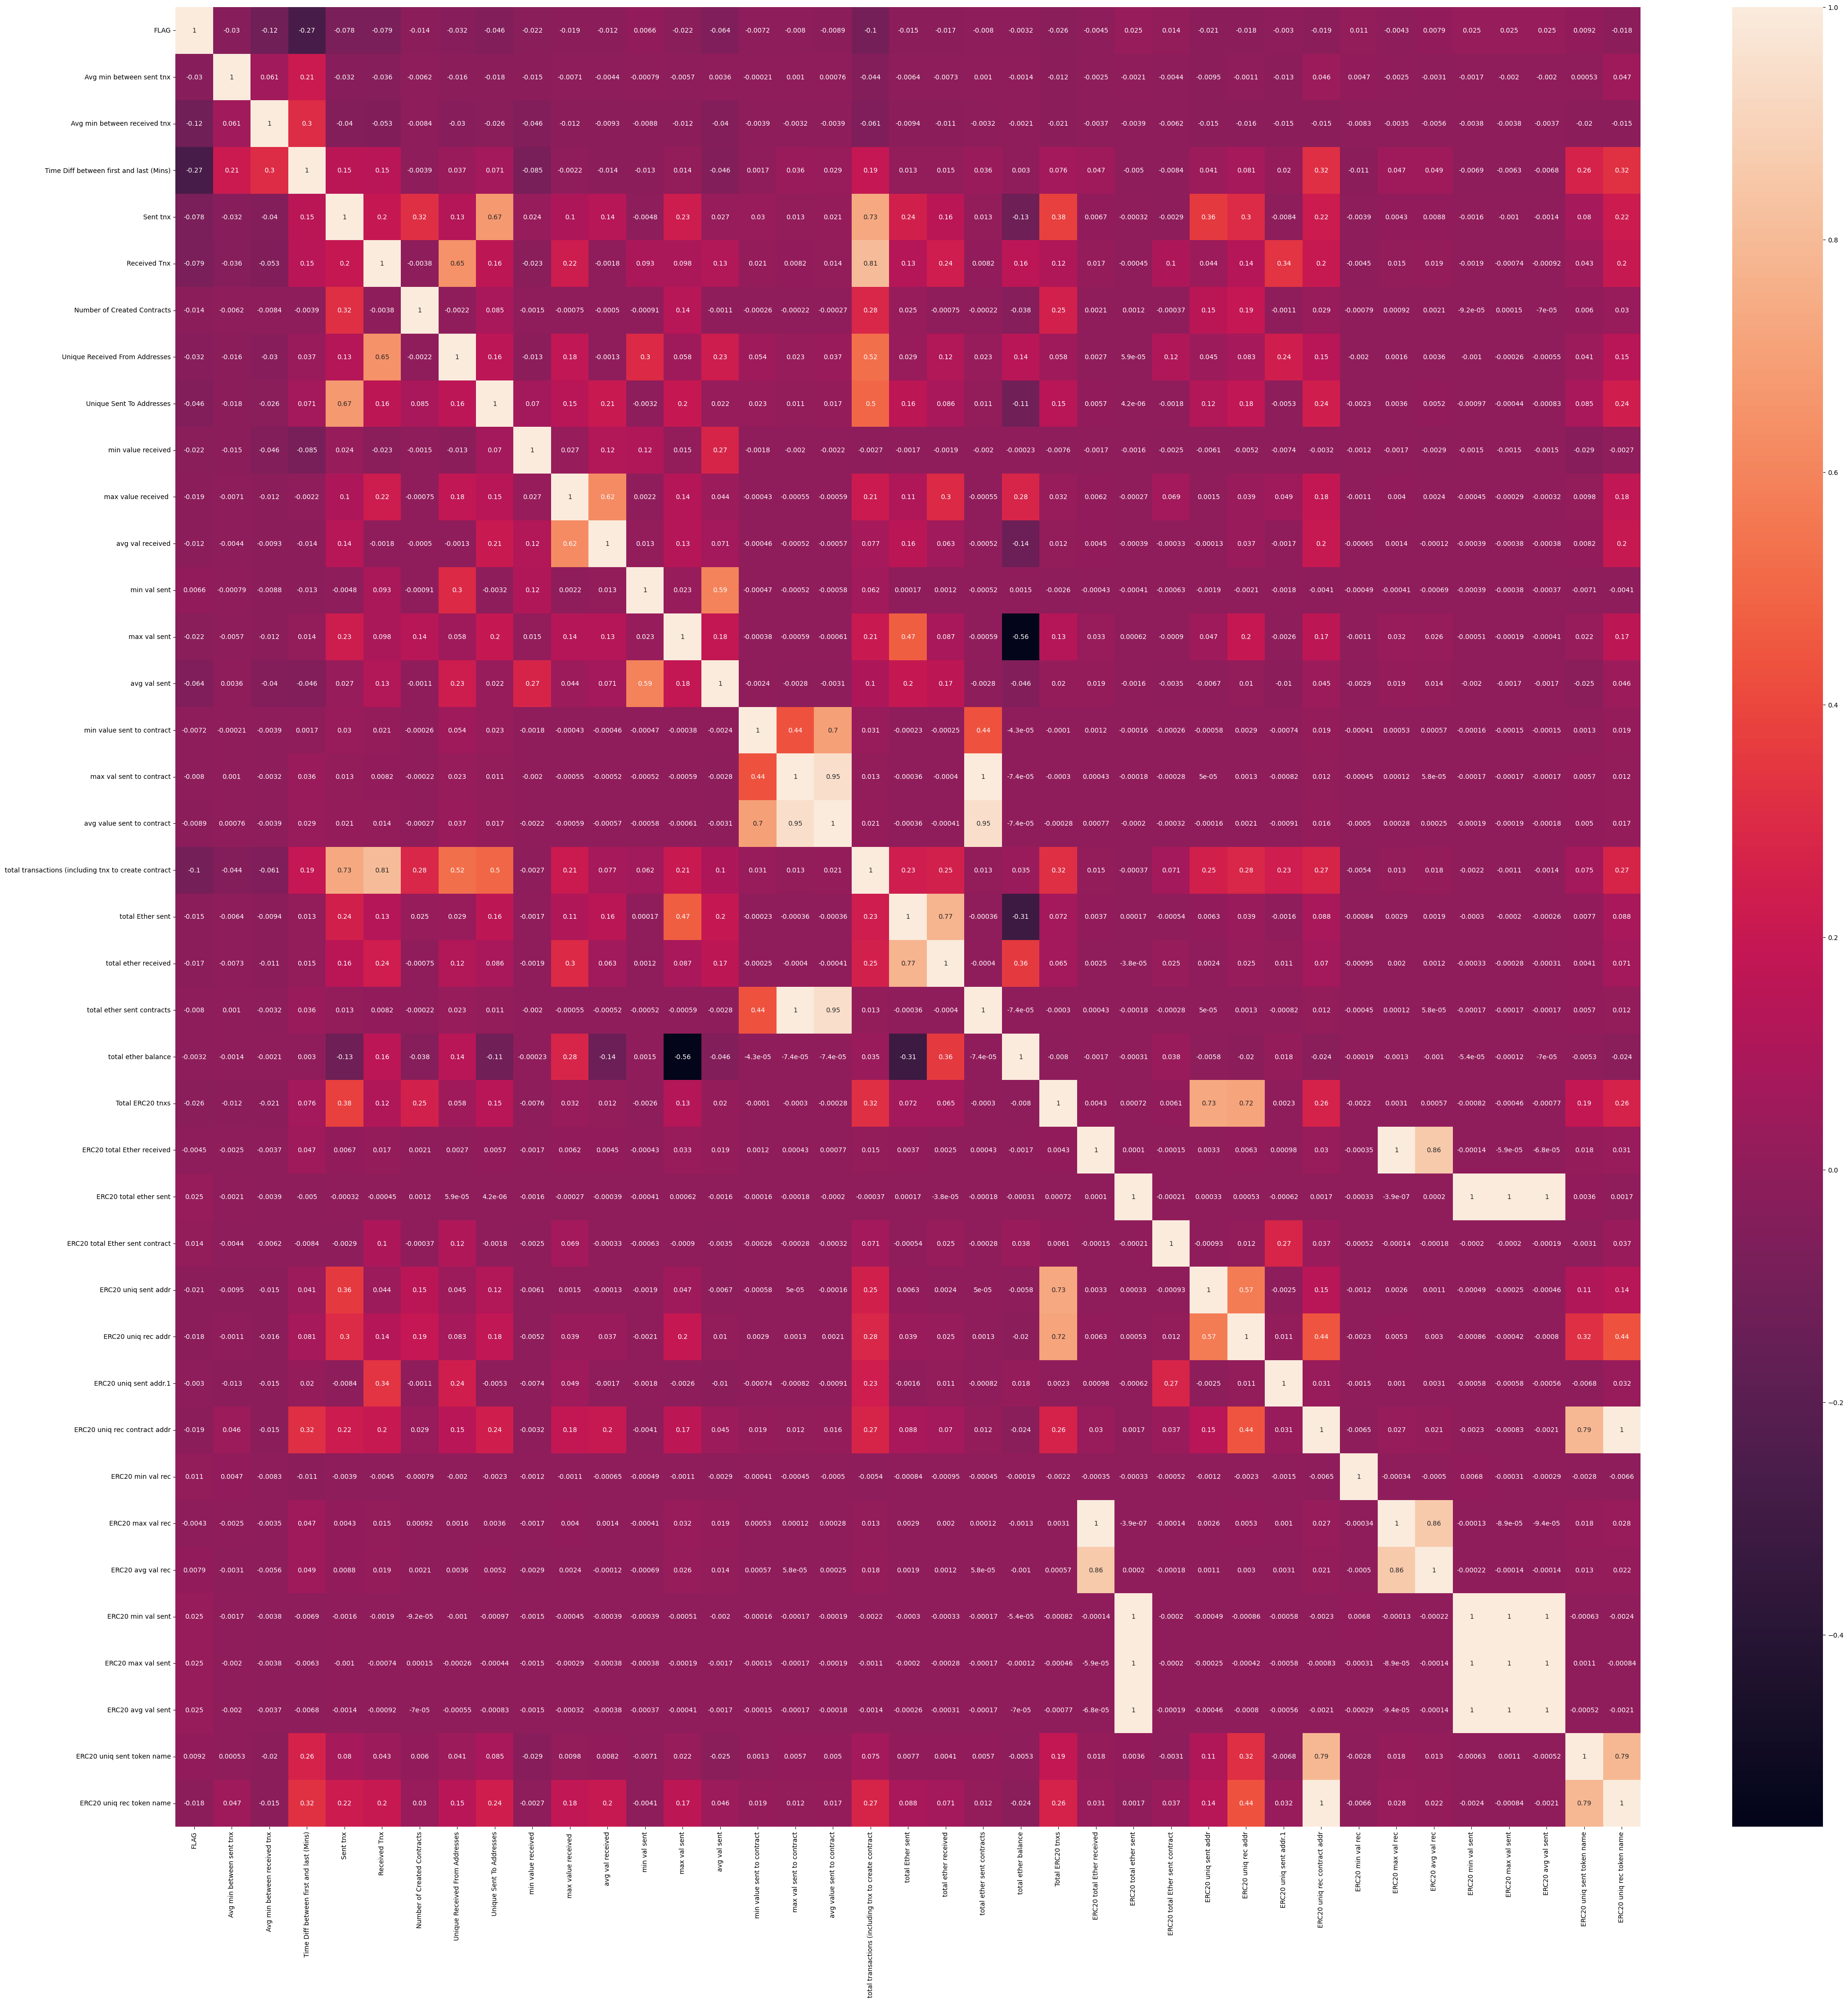

In [ ]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True)

In [ ]:
xgb = XGBClassifier(random_state=42)

xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb)
])

xgb_pipe.fit(X_train, y_train)
xgb_preds = xgb_pipe.predict(X_test)
xgb_probs = xgb_pipe.predict_proba(X_test)[:,1]

In [ ]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1542
           1       1.00      0.98      0.99       427

    accuracy                           0.99      1969
   macro avg       0.99      0.99      0.99      1969
weighted avg       0.99      0.99      0.99      1969



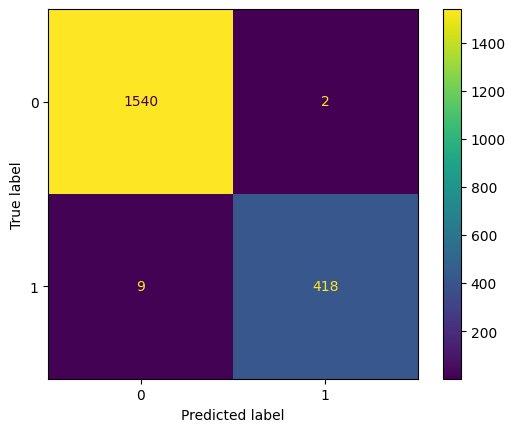

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,xgb_preds)).plot()

In [ ]:
X_train_preprocessed=preprocessor.fit_transform(X_train)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_preprocessed, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: FLAG
0    6120
1    1752
Name: count, dtype: int64
After SMOTE: FLAG
0    6120
1    6120
Name: count, dtype: int64


In [ ]:
xgb = XGBClassifier(random_state=42)

xgb_smote_pipe = imbPipeline([
    ('preprocessor', preprocessor),
    ('smote',sm),
    ('model', xgb)
])

xgb_smote_pipe.fit(X_train, y_train)
xgb_sm_preds = xgb_smote_pipe.predict(X_test)
xgb_sm_probs = xgb_smote_pipe.predict_proba(X_test)[:,1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, xgb_sm_preds))
print("Precision:", precision_score(y_test, xgb_sm_preds))
print("Recall:", recall_score(y_test, xgb_sm_preds))
print("F1 Score:", f1_score(y_test, xgb_sm_preds))

Accuracy: 0.9954291518537328
Precision: 0.995260663507109
Recall: 0.9836065573770492
F1 Score: 0.9893992932862191


In [ ]:
print(classification_report(y_test,xgb_sm_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1542
           1       1.00      0.98      0.99       427

    accuracy                           1.00      1969
   macro avg       1.00      0.99      0.99      1969
weighted avg       1.00      1.00      1.00      1969



In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_sm_probs)

f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print("Best threshold for F1:", best_threshold)
print("Max F1 score:", f1_scores[best_idx])

Best threshold for F1: 0.3088802
Max F1 score: 0.9894485035179386


In [ ]:
xgb_custom_preds=(xgb_sm_probs >= best_threshold).astype(int)
print(classification_report(y_test, xgb_custom_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1542
           1       0.99      0.99      0.99       427

    accuracy                           1.00      1969
   macro avg       0.99      0.99      0.99      1969
weighted avg       1.00      1.00      1.00      1969



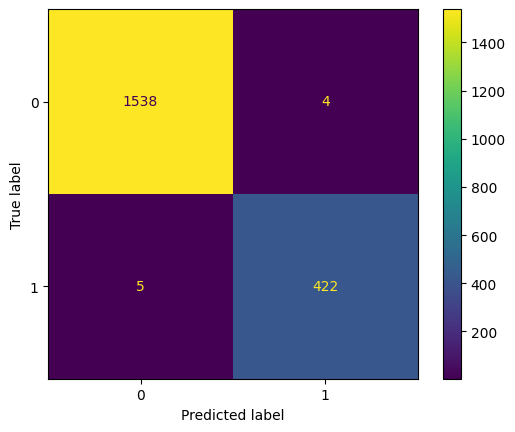

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,xgb_custom_preds)).plot()

In [ ]:
param_dist = {
    "model__n_estimators": [200, 500, 800],
    "model__max_depth": [3, 5, 7, 10],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__gamma": [0, 1, 5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_smote_pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best params:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'model__subsample': 0.6, 'model__n_estimators': 800, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 0.8}


In [ ]:
y_xgb_best_probs = best_model.predict_proba(X_test)[:,1]
y_xgb_best_preds = best_model.predict(X_test)
# ROC AUC
print("Accuracy:", accuracy_score(y_test, y_xgb_best_preds))
print("Precision:", precision_score(y_test, y_xgb_best_preds))
print("Recall:", recall_score(y_test, y_xgb_best_preds))
print("F1 Score:", f1_score(y_test, y_xgb_best_preds))

Accuracy: 0.994413407821229
Precision: 0.9928909952606635
Recall: 0.9812646370023419
F1 Score: 0.9870435806831567


In [ ]:
print(classification_report(y_test,y_xgb_best_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1542
           1       0.99      0.98      0.99       427

    accuracy                           0.99      1969
   macro avg       0.99      0.99      0.99      1969
weighted avg       0.99      0.99      0.99      1969



In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_sm_probs)

f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print("Best threshold for F1:", best_threshold)
print("Max F1 score:", f1_scores[best_idx])

Best threshold for F1: 0.3088802
Max F1 score: 0.9894485035179386


In [ ]:
xgb_best_custom_preds=(xgb_sm_probs >= best_threshold).astype(int)
print(classification_report(y_test, xgb_best_custom_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1542
           1       0.99      0.99      0.99       427

    accuracy                           1.00      1969
   macro avg       0.99      0.99      0.99      1969
weighted avg       1.00      1.00      1.00      1969



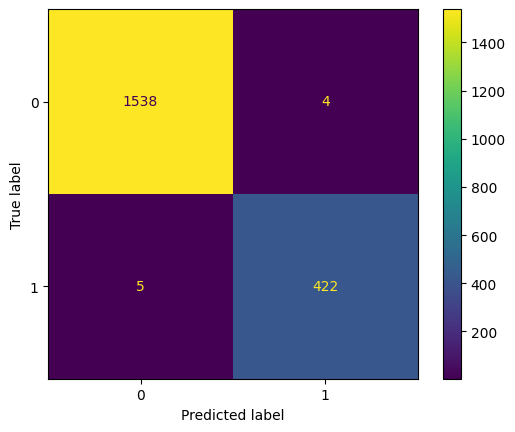

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,xgb_best_custom_preds)).plot()

In [ ]:
max_i=0
max_j=0
max=0
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  for k in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    ensemble_probs =  i* xgb_sm_probs +(1-i)* y_xgb_best_probs
    ensemble_preds = (ensemble_probs >= k).astype(int)
    if f1_score(y_test, ensemble_preds)>max:
      max=f1_score(y_test, ensemble_preds)
      max_i=i
      max_k=k
    #print("F1 Score for weight"+str(i),"and threshold",str(j),str(f1_score(y_test, ensemble_preds)))
print(max,max_i,max_j,max_k)


0.9905437352245863 0.3 0 0.7


In [ ]:
max_ensemble_probs =  max_i* xgb_sm_probs + (1-max_i) * y_xgb_best_probs
max_ensemble_preds = (max_ensemble_probs >= max_k).astype(int)
print(classification_report(y_test, max_ensemble_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1542
           1       1.00      0.98      0.99       427

    accuracy                           1.00      1969
   macro avg       1.00      0.99      0.99      1969
weighted avg       1.00      1.00      1.00      1969



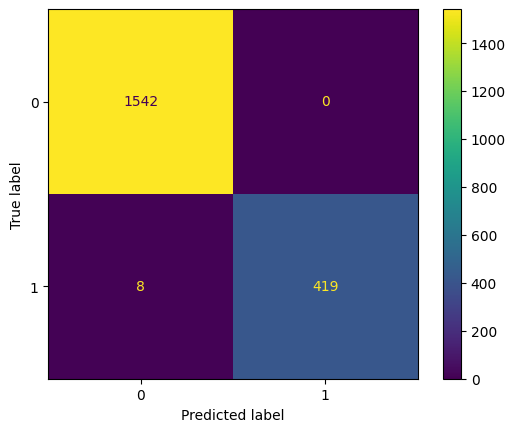

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,max_ensemble_preds)).plot()